In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [9]:
# Cargar dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

In [10]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [33]:
# Entrenar múltiples modelos
modelos = {
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Arbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    resultados[nombre] = {
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    print(f"{nombre}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}\n")

Regresión Logística:
  Accuracy: 0.9815
  Precision: 0.9827
  Recall: 0.9815
  F1-Score: 0.9816

Arbol de Decisión:
  Accuracy: 0.9444
  Precision: 0.9466
  Recall: 0.9444
  F1-Score: 0.9442

Random Forest:
  Accuracy: 0.9815
  Precision: 0.9827
  Recall: 0.9815
  F1-Score: 0.9816

K-Nearest Neighbors:
  Accuracy: 0.9630
  Precision: 0.9651
  Recall: 0.9630
  F1-Score: 0.9626



In [34]:
# Elegir el mejor modelo (por F1-Score)
mejor_modelo_nombre = max(resultados, key=lambda x: resultados[x]['F1-Score'])
print(f"\n✅ Mejor modelo según F1-Score: {mejor_modelo_nombre}")


✅ Mejor modelo según F1-Score: Regresión Logística


In [35]:
# Optimizar el mejor modelo con GridSearchCV
if mejor_modelo_nombre == 'Regresión Logística':
    modelo = LogisticRegression(max_iter=1000)
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }
elif mejor_modelo_nombre == 'Arbol de Decisión':
    modelo = DecisionTreeClassifier()
    param_grid = {
        'max_depth': [None, 5, 10],
        'criterion': ['gini', 'entropy']
    }
elif mejor_modelo_nombre == 'Random Forest':
    modelo = RandomForestClassifier()
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5, 10]
    }
elif mejor_modelo_nombre == 'K-Nearest Neighbors':
    modelo = KNeighborsClassifier()
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }

In [38]:
# Definir los mejores hiperparámetros para el modelo seleccionado
if mejor_modelo_nombre == "Regresión Logística":
    grid = {"C": [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
    modelo_base = LogisticRegression(max_iter=10000)
elif mejor_modelo_nombre == "Arbol de Decisión":
    grid = {"max_depth": [3, 5, 10]}
    modelo_base = DecisionTreeClassifier()
elif mejor_modelo_nombre == "Random Forest":
    grid = {"n_estimators": [50, 100, 200]}
    modelo_base = RandomForestClassifier()
elif mejor_modelo_nombre == "K-Nearest Neighbors":
    grid = {"n_neighbors": [3, 5, 7]}
    modelo_base = KNeighborsClassifier()

grid_search = GridSearchCV(modelo_base, grid, cv=5)
grid_search.fit(X_train, y_train)
mejores_parametros = grid_search.best_params_
print(f"Mejores hiperparámetros encontrados para {mejor_modelo_nombre}: {mejores_parametros}")

Mejores hiperparámetros encontrados para Regresión Logística: {'C': 10, 'solver': 'liblinear'}


In [40]:
# Reentrenar el mejor modelo con los mejores hiperparámetros
if mejor_modelo_nombre == "Regresión Logística":
    modelo_final = LogisticRegression(**mejores_parametros, max_iter=10000)
elif mejor_modelo_nombre == "Arbol de Decisión":
    modelo_final = DecisionTreeClassifier(**mejores_parametros)
elif mejor_modelo_nombre == "Random Forest":
    modelo_final = RandomForestClassifier(**mejores_parametros)
elif mejor_modelo_nombre == "K-Nearest Neighbors":
    modelo_final = KNeighborsClassifier(**mejores_parametros)

modelo_final.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=10000, solver='liblinear')

Evaluación del Modelo Final (Random Forest):
Accuracy:  0.9815
Precision: 0.9824
Recall:    0.9815
F1-score:  0.9815

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



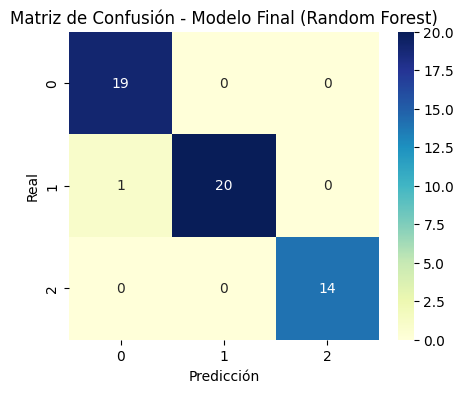

In [41]:
# Predicciones con el modelo final
y_pred_final = modelo_final.predict(X_test)

# Métricas de evaluación
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted')
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

print("Evaluación del Modelo Final (Random Forest):")
print(f"Accuracy:  {acc_final:.4f}")
print(f"Precision: {prec_final:.4f}")
print(f"Recall:    {rec_final:.4f}")
print(f"F1-score:  {f1_final:.4f}")

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

# Matriz de confusión
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Matriz de Confusión - Modelo Final (Random Forest)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()